# Moving Average Strat

* import the data for the stock and format it


In [68]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_ta as ta
import matplotlib.pyplot as plt


end_date = '2025-06-27'
start_date = '2023-06-07'
stock = 'BLK'

df = yf.download(tickers=stock,start=start_date,end=end_date,auto_adjust=True)
df.columns = df.columns.get_level_values(0)
df.columns = df.columns.str.lower()
df


[*********************100%***********************]  1 of 1 completed


Price,close,high,low,open,volume
Date,,,,,
2023-06-07,646.311951,648.027288,638.650340,647.045732,534100
2023-06-08,648.551392,649.809278,634.667060,643.538922,521800
2023-06-09,652.191528,654.145042,645.397068,650.276111,465300
2023-06-12,650.266663,656.689464,650.152315,652.391698,435000
2023-06-13,656.660889,660.472645,652.763342,653.077828,624000
...,...,...,...,...,...
2025-06-20,974.440002,986.909973,973.210022,982.210022,859500
2025-06-23,986.299988,986.450012,966.479980,975.320007,642900
2025-06-24,1004.969971,1005.849976,993.000000,995.500000,699500


# Create The Moving Average Function

ConversionError: Failed to convert value(s) to axis units: array([(Timestamp('2023-06-07 00:00:00'), 'BLK'),
       (Timestamp('2023-06-08 00:00:00'), 'BLK'),
       (Timestamp('2023-06-09 00:00:00'), 'BLK'),
       (Timestamp('2023-06-12 00:00:00'), 'BLK'),
       (Timestamp('2023-06-13 00:00:00'), 'BLK'),
       (Timestamp('2023-06-14 00:00:00'), 'BLK'),
       (Timestamp('2023-06-15 00:00:00'), 'BLK'),
       (Timestamp('2023-06-16 00:00:00'), 'BLK'),
       (Timestamp('2023-06-20 00:00:00'), 'BLK'),
       (Timestamp('2023-06-21 00:00:00'), 'BLK'),
       (Timestamp('2023-06-22 00:00:00'), 'BLK'),
       (Timestamp('2023-06-23 00:00:00'), 'BLK'),
       (Timestamp('2023-06-26 00:00:00'), 'BLK'),
       (Timestamp('2023-06-27 00:00:00'), 'BLK'),
       (Timestamp('2023-06-28 00:00:00'), 'BLK'),
       (Timestamp('2023-06-29 00:00:00'), 'BLK'),
       (Timestamp('2023-06-30 00:00:00'), 'BLK'),
       (Timestamp('2023-07-03 00:00:00'), 'BLK'),
       (Timestamp('2023-07-05 00:00:00'), 'BLK'),
       (Timestamp('2023-07-06 00:00:00'), 'BLK'),
       (Timestamp('2023-07-07 00:00:00'), 'BLK'),
       (Timestamp('2023-07-10 00:00:00'), 'BLK'),
       (Timestamp('2023-07-11 00:00:00'), 'BLK'),
       (Timestamp('2023-07-12 00:00:00'), 'BLK'),
       (Timestamp('2023-07-13 00:00:00'), 'BLK'),
       (Timestamp('2023-07-14 00:00:00'), 'BLK'),
       (Timestamp('2023-07-17 00:00:00'), 'BLK'),
       (Timestamp('2023-07-18 00:00:00'), 'BLK'),
       (Timestamp('2023-07-19 00:00:00'), 'BLK'),
       (Timestamp('2023-07-20 00:00:00'), 'BLK'),
       (Timestamp('2023-07-21 00:00:00'), 'BLK'),
       (Timestamp('2023-07-24 00:00:00'), 'BLK'),
       (Timestamp('2023-07-25 00:00:00'), 'BLK'),
       (Timestamp('2023-07-26 00:00:00'), 'BLK'),
       (Timestamp('2023-07-27 00:00:00'), 'BLK'),
       (Timestamp('2023-07-28 00:00:00'), 'BLK'),
       (Timestamp('2023-07-31 00:00:00'), 'BLK'),
       (Timestamp('2023-08-01 00:00:00'), 'BLK'),
       (Timestamp('2023-08-02 00:00:00'), 'BLK'),
       (Timestamp('2023-08-03 00:00:00'), 'BLK'),
       (Timestamp('2023-08-04 00:00:00'), 'BLK'),
       (Timestamp('2023-08-07 00:00:00'), 'BLK'),
       (Timestamp('2023-08-08 00:00:00'), 'BLK'),
       (Timestamp('2023-08-09 00:00:00'), 'BLK'),
       (Timestamp('2023-08-10 00:00:00'), 'BLK'),
       (Timestamp('2023-08-11 00:00:00'), 'BLK'),
       (Timestamp('2023-08-14 00:00:00'), 'BLK'),
       (Timestamp('2023-08-15 00:00:00'), 'BLK'),
       (Timestamp('2023-08-16 00:00:00'), 'BLK'),
       (Timestamp('2023-08-17 00:00:00'), 'BLK'),
       (Timestamp('2023-08-18 00:00:00'), 'BLK'),
       (Timestamp('2023-08-21 00:00:00'), 'BLK'),
       (Timestamp('2023-08-22 00:00:00'), 'BLK'),
       (Timestamp('2023-08-23 00:00:00'), 'BLK'),
       (Timestamp('2023-08-24 00:00:00'), 'BLK'),
       (Timestamp('2023-08-25 00:00:00'), 'BLK'),
       (Timestamp('2023-08-28 00:00:00'), 'BLK'),
       (Timestamp('2023-08-29 00:00:00'), 'BLK'),
       (Timestamp('2023-08-30 00:00:00'), 'BLK'),
       (Timestamp('2023-08-31 00:00:00'), 'BLK'),
       (Timestamp('2023-09-01 00:00:00'), 'BLK'),
       (Timestamp('2023-09-05 00:00:00'), 'BLK'),
       (Timestamp('2023-09-06 00:00:00'), 'BLK'),
       (Timestamp('2023-09-07 00:00:00'), 'BLK'),
       (Timestamp('2023-09-08 00:00:00'), 'BLK'),
       (Timestamp('2023-09-11 00:00:00'), 'BLK'),
       (Timestamp('2023-09-12 00:00:00'), 'BLK'),
       (Timestamp('2023-09-13 00:00:00'), 'BLK'),
       (Timestamp('2023-09-14 00:00:00'), 'BLK'),
       (Timestamp('2023-09-15 00:00:00'), 'BLK'),
       (Timestamp('2023-09-18 00:00:00'), 'BLK'),
       (Timestamp('2023-09-19 00:00:00'), 'BLK'),
       (Timestamp('2023-09-20 00:00:00'), 'BLK'),
       (Timestamp('2023-09-21 00:00:00'), 'BLK'),
       (Timestamp('2023-09-22 00:00:00'), 'BLK'),
       (Timestamp('2023-09-25 00:00:00'), 'BLK'),
       (Timestamp('2023-09-26 00:00:00'), 'BLK'),
       (Timestamp('2023-09-27 00:00:00'), 'BLK'),
       (Timestamp('2023-09-28 00:00:00'), 'BLK'),
       (Timestamp('2023-09-29 00:00:00'), 'BLK'),
       (Timestamp('2023-10-02 00:00:00'), 'BLK'),
       (Timestamp('2023-10-03 00:00:00'), 'BLK'),
       (Timestamp('2023-10-04 00:00:00'), 'BLK'),
       (Timestamp('2023-10-05 00:00:00'), 'BLK'),
       (Timestamp('2023-10-06 00:00:00'), 'BLK'),
       (Timestamp('2023-10-09 00:00:00'), 'BLK'),
       (Timestamp('2023-10-10 00:00:00'), 'BLK'),
       (Timestamp('2023-10-11 00:00:00'), 'BLK'),
       (Timestamp('2023-10-12 00:00:00'), 'BLK'),
       (Timestamp('2023-10-13 00:00:00'), 'BLK'),
       (Timestamp('2023-10-16 00:00:00'), 'BLK'),
       (Timestamp('2023-10-17 00:00:00'), 'BLK'),
       (Timestamp('2023-10-18 00:00:00'), 'BLK'),
       (Timestamp('2023-10-19 00:00:00'), 'BLK'),
       (Timestamp('2023-10-20 00:00:00'), 'BLK'),
       (Timestamp('2023-10-23 00:00:00'), 'BLK'),
       (Timestamp('2023-10-24 00:00:00'), 'BLK'),
       (Timestamp('2023-10-25 00:00:00'), 'BLK'),
       (Timestamp('2023-10-26 00:00:00'), 'BLK'),
       (Timestamp('2023-10-27 00:00:00'), 'BLK'),
       (Timestamp('2023-10-30 00:00:00'), 'BLK'),
       (Timestamp('2023-10-31 00:00:00'), 'BLK'),
       (Timestamp('2023-11-01 00:00:00'), 'BLK'),
       (Timestamp('2023-11-02 00:00:00'), 'BLK'),
       (Timestamp('2023-11-03 00:00:00'), 'BLK'),
       (Timestamp('2023-11-06 00:00:00'), 'BLK'),
       (Timestamp('2023-11-07 00:00:00'), 'BLK'),
       (Timestamp('2023-11-08 00:00:00'), 'BLK'),
       (Timestamp('2023-11-09 00:00:00'), 'BLK'),
       (Timestamp('2023-11-10 00:00:00'), 'BLK'),
       (Timestamp('2023-11-13 00:00:00'), 'BLK'),
       (Timestamp('2023-11-14 00:00:00'), 'BLK'),
       (Timestamp('2023-11-15 00:00:00'), 'BLK'),
       (Timestamp('2023-11-16 00:00:00'), 'BLK'),
       (Timestamp('2023-11-17 00:00:00'), 'BLK'),
       (Timestamp('2023-11-20 00:00:00'), 'BLK'),
       (Timestamp('2023-11-21 00:00:00'), 'BLK'),
       (Timestamp('2023-11-22 00:00:00'), 'BLK'),
       (Timestamp('2023-11-24 00:00:00'), 'BLK'),
       (Timestamp('2023-11-27 00:00:00'), 'BLK'),
       (Timestamp('2023-11-28 00:00:00'), 'BLK'),
       (Timestamp('2023-11-29 00:00:00'), 'BLK'),
       (Timestamp('2023-11-30 00:00:00'), 'BLK'),
       (Timestamp('2023-12-01 00:00:00'), 'BLK'),
       (Timestamp('2023-12-04 00:00:00'), 'BLK'),
       (Timestamp('2023-12-05 00:00:00'), 'BLK'),
       (Timestamp('2023-12-06 00:00:00'), 'BLK'),
       (Timestamp('2023-12-07 00:00:00'), 'BLK'),
       (Timestamp('2023-12-08 00:00:00'), 'BLK'),
       (Timestamp('2023-12-11 00:00:00'), 'BLK'),
       (Timestamp('2023-12-12 00:00:00'), 'BLK'),
       (Timestamp('2023-12-13 00:00:00'), 'BLK'),
       (Timestamp('2023-12-14 00:00:00'), 'BLK'),
       (Timestamp('2023-12-15 00:00:00'), 'BLK'),
       (Timestamp('2023-12-18 00:00:00'), 'BLK'),
       (Timestamp('2023-12-19 00:00:00'), 'BLK'),
       (Timestamp('2023-12-20 00:00:00'), 'BLK'),
       (Timestamp('2023-12-21 00:00:00'), 'BLK'),
       (Timestamp('2023-12-22 00:00:00'), 'BLK'),
       (Timestamp('2023-12-26 00:00:00'), 'BLK'),
       (Timestamp('2023-12-27 00:00:00'), 'BLK'),
       (Timestamp('2023-12-28 00:00:00'), 'BLK'),
       (Timestamp('2023-12-29 00:00:00'), 'BLK'),
       (Timestamp('2024-01-02 00:00:00'), 'BLK'),
       (Timestamp('2024-01-03 00:00:00'), 'BLK'),
       (Timestamp('2024-01-04 00:00:00'), 'BLK'),
       (Timestamp('2024-01-05 00:00:00'), 'BLK'),
       (Timestamp('2024-01-08 00:00:00'), 'BLK'),
       (Timestamp('2024-01-09 00:00:00'), 'BLK'),
       (Timestamp('2024-01-10 00:00:00'), 'BLK'),
       (Timestamp('2024-01-11 00:00:00'), 'BLK'),
       (Timestamp('2024-01-12 00:00:00'), 'BLK'),
       (Timestamp('2024-01-16 00:00:00'), 'BLK'),
       (Timestamp('2024-01-17 00:00:00'), 'BLK'),
       (Timestamp('2024-01-18 00:00:00'), 'BLK'),
       (Timestamp('2024-01-19 00:00:00'), 'BLK'),
       (Timestamp('2024-01-22 00:00:00'), 'BLK'),
       (Timestamp('2024-01-23 00:00:00'), 'BLK'),
       (Timestamp('2024-01-24 00:00:00'), 'BLK'),
       (Timestamp('2024-01-25 00:00:00'), 'BLK'),
       (Timestamp('2024-01-26 00:00:00'), 'BLK'),
       (Timestamp('2024-01-29 00:00:00'), 'BLK'),
       (Timestamp('2024-01-30 00:00:00'), 'BLK'),
       (Timestamp('2024-01-31 00:00:00'), 'BLK'),
       (Timestamp('2024-02-01 00:00:00'), 'BLK'),
       (Timestamp('2024-02-02 00:00:00'), 'BLK'),
       (Timestamp('2024-02-05 00:00:00'), 'BLK'),
       (Timestamp('2024-02-06 00:00:00'), 'BLK'),
       (Timestamp('2024-02-07 00:00:00'), 'BLK'),
       (Timestamp('2024-02-08 00:00:00'), 'BLK'),
       (Timestamp('2024-02-09 00:00:00'), 'BLK'),
       (Timestamp('2024-02-12 00:00:00'), 'BLK'),
       (Timestamp('2024-02-13 00:00:00'), 'BLK'),
       (Timestamp('2024-02-14 00:00:00'), 'BLK'),
       (Timestamp('2024-02-15 00:00:00'), 'BLK'),
       (Timestamp('2024-02-16 00:00:00'), 'BLK'),
       (Timestamp('2024-02-20 00:00:00'), 'BLK'),
       (Timestamp('2024-02-21 00:00:00'), 'BLK'),
       (Timestamp('2024-02-22 00:00:00'), 'BLK'),
       (Timestamp('2024-02-23 00:00:00'), 'BLK'),
       (Timestamp('2024-02-26 00:00:00'), 'BLK'),
       (Timestamp('2024-02-27 00:00:00'), 'BLK'),
       (Timestamp('2024-02-28 00:00:00'), 'BLK'),
       (Timestamp('2024-02-29 00:00:00'), 'BLK'),
       (Timestamp('2024-03-01 00:00:00'), 'BLK'),
       (Timestamp('2024-03-04 00:00:00'), 'BLK'),
       (Timestamp('2024-03-05 00:00:00'), 'BLK'),
       (Timestamp('2024-03-06 00:00:00'), 'BLK'),
       (Timestamp('2024-03-07 00:00:00'), 'BLK'),
       (Timestamp('2024-03-08 00:00:00'), 'BLK'),
       (Timestamp('2024-03-11 00:00:00'), 'BLK'),
       (Timestamp('2024-03-12 00:00:00'), 'BLK'),
       (Timestamp('2024-03-13 00:00:00'), 'BLK'),
       (Timestamp('2024-03-14 00:00:00'), 'BLK'),
       (Timestamp('2024-03-15 00:00:00'), 'BLK'),
       (Timestamp('2024-03-18 00:00:00'), 'BLK'),
       (Timestamp('2024-03-19 00:00:00'), 'BLK'),
       (Timestamp('2024-03-20 00:00:00'), 'BLK'),
       (Timestamp('2024-03-21 00:00:00'), 'BLK'),
       (Timestamp('2024-03-22 00:00:00'), 'BLK'),
       (Timestamp('2024-03-25 00:00:00'), 'BLK'),
       (Timestamp('2024-03-26 00:00:00'), 'BLK'),
       (Timestamp('2024-03-27 00:00:00'), 'BLK'),
       (Timestamp('2024-03-28 00:00:00'), 'BLK'),
       (Timestamp('2024-04-01 00:00:00'), 'BLK'),
       (Timestamp('2024-04-02 00:00:00'), 'BLK'),
       (Timestamp('2024-04-03 00:00:00'), 'BLK'),
       (Timestamp('2024-04-04 00:00:00'), 'BLK'),
       (Timestamp('2024-04-05 00:00:00'), 'BLK'),
       (Timestamp('2024-04-08 00:00:00'), 'BLK'),
       (Timestamp('2024-04-09 00:00:00'), 'BLK'),
       (Timestamp('2024-04-10 00:00:00'), 'BLK'),
       (Timestamp('2024-04-11 00:00:00'), 'BLK'),
       (Timestamp('2024-04-12 00:00:00'), 'BLK'),
       (Timestamp('2024-04-15 00:00:00'), 'BLK'),
       (Timestamp('2024-04-16 00:00:00'), 'BLK'),
       (Timestamp('2024-04-17 00:00:00'), 'BLK'),
       (Timestamp('2024-04-18 00:00:00'), 'BLK'),
       (Timestamp('2024-04-19 00:00:00'), 'BLK'),
       (Timestamp('2024-04-22 00:00:00'), 'BLK'),
       (Timestamp('2024-04-23 00:00:00'), 'BLK'),
       (Timestamp('2024-04-24 00:00:00'), 'BLK'),
       (Timestamp('2024-04-25 00:00:00'), 'BLK'),
       (Timestamp('2024-04-26 00:00:00'), 'BLK'),
       (Timestamp('2024-04-29 00:00:00'), 'BLK'),
       (Timestamp('2024-04-30 00:00:00'), 'BLK'),
       (Timestamp('2024-05-01 00:00:00'), 'BLK'),
       (Timestamp('2024-05-02 00:00:00'), 'BLK'),
       (Timestamp('2024-05-03 00:00:00'), 'BLK'),
       (Timestamp('2024-05-06 00:00:00'), 'BLK'),
       (Timestamp('2024-05-07 00:00:00'), 'BLK'),
       (Timestamp('2024-05-08 00:00:00'), 'BLK'),
       (Timestamp('2024-05-09 00:00:00'), 'BLK'),
       (Timestamp('2024-05-10 00:00:00'), 'BLK'),
       (Timestamp('2024-05-13 00:00:00'), 'BLK'),
       (Timestamp('2024-05-14 00:00:00'), 'BLK'),
       (Timestamp('2024-05-15 00:00:00'), 'BLK'),
       (Timestamp('2024-05-16 00:00:00'), 'BLK'),
       (Timestamp('2024-05-17 00:00:00'), 'BLK'),
       (Timestamp('2024-05-20 00:00:00'), 'BLK'),
       (Timestamp('2024-05-21 00:00:00'), 'BLK'),
       (Timestamp('2024-05-22 00:00:00'), 'BLK'),
       (Timestamp('2024-05-23 00:00:00'), 'BLK'),
       (Timestamp('2024-05-24 00:00:00'), 'BLK'),
       (Timestamp('2024-05-28 00:00:00'), 'BLK'),
       (Timestamp('2024-05-29 00:00:00'), 'BLK'),
       (Timestamp('2024-05-30 00:00:00'), 'BLK'),
       (Timestamp('2024-05-31 00:00:00'), 'BLK'),
       (Timestamp('2024-06-03 00:00:00'), 'BLK'),
       (Timestamp('2024-06-04 00:00:00'), 'BLK'),
       (Timestamp('2024-06-05 00:00:00'), 'BLK'),
       (Timestamp('2024-06-06 00:00:00'), 'BLK'),
       (Timestamp('2024-06-07 00:00:00'), 'BLK'),
       (Timestamp('2024-06-10 00:00:00'), 'BLK'),
       (Timestamp('2024-06-11 00:00:00'), 'BLK'),
       (Timestamp('2024-06-12 00:00:00'), 'BLK'),
       (Timestamp('2024-06-13 00:00:00'), 'BLK'),
       (Timestamp('2024-06-14 00:00:00'), 'BLK'),
       (Timestamp('2024-06-17 00:00:00'), 'BLK'),
       (Timestamp('2024-06-18 00:00:00'), 'BLK'),
       (Timestamp('2024-06-20 00:00:00'), 'BLK'),
       (Timestamp('2024-06-21 00:00:00'), 'BLK'),
       (Timestamp('2024-06-24 00:00:00'), 'BLK'),
       (Timestamp('2024-06-25 00:00:00'), 'BLK'),
       (Timestamp('2024-06-26 00:00:00'), 'BLK'),
       (Timestamp('2024-06-27 00:00:00'), 'BLK'),
       (Timestamp('2024-06-28 00:00:00'), 'BLK'),
       (Timestamp('2024-07-01 00:00:00'), 'BLK'),
       (Timestamp('2024-07-02 00:00:00'), 'BLK'),
       (Timestamp('2024-07-03 00:00:00'), 'BLK'),
       (Timestamp('2024-07-05 00:00:00'), 'BLK'),
       (Timestamp('2024-07-08 00:00:00'), 'BLK'),
       (Timestamp('2024-07-09 00:00:00'), 'BLK'),
       (Timestamp('2024-07-10 00:00:00'), 'BLK'),
       (Timestamp('2024-07-11 00:00:00'), 'BLK'),
       (Timestamp('2024-07-12 00:00:00'), 'BLK'),
       (Timestamp('2024-07-15 00:00:00'), 'BLK'),
       (Timestamp('2024-07-16 00:00:00'), 'BLK'),
       (Timestamp('2024-07-17 00:00:00'), 'BLK'),
       (Timestamp('2024-07-18 00:00:00'), 'BLK'),
       (Timestamp('2024-07-19 00:00:00'), 'BLK'),
       (Timestamp('2024-07-22 00:00:00'), 'BLK'),
       (Timestamp('2024-07-23 00:00:00'), 'BLK'),
       (Timestamp('2024-07-24 00:00:00'), 'BLK'),
       (Timestamp('2024-07-25 00:00:00'), 'BLK'),
       (Timestamp('2024-07-26 00:00:00'), 'BLK'),
       (Timestamp('2024-07-29 00:00:00'), 'BLK'),
       (Timestamp('2024-07-30 00:00:00'), 'BLK'),
       (Timestamp('2024-07-31 00:00:00'), 'BLK'),
       (Timestamp('2024-08-01 00:00:00'), 'BLK'),
       (Timestamp('2024-08-02 00:00:00'), 'BLK'),
       (Timestamp('2024-08-05 00:00:00'), 'BLK'),
       (Timestamp('2024-08-06 00:00:00'), 'BLK'),
       (Timestamp('2024-08-07 00:00:00'), 'BLK'),
       (Timestamp('2024-08-08 00:00:00'), 'BLK'),
       (Timestamp('2024-08-09 00:00:00'), 'BLK'),
       (Timestamp('2024-08-12 00:00:00'), 'BLK'),
       (Timestamp('2024-08-13 00:00:00'), 'BLK'),
       (Timestamp('2024-08-14 00:00:00'), 'BLK'),
       (Timestamp('2024-08-15 00:00:00'), 'BLK'),
       (Timestamp('2024-08-16 00:00:00'), 'BLK'),
       (Timestamp('2024-08-19 00:00:00'), 'BLK'),
       (Timestamp('2024-08-20 00:00:00'), 'BLK'),
       (Timestamp('2024-08-21 00:00:00'), 'BLK'),
       (Timestamp('2024-08-22 00:00:00'), 'BLK'),
       (Timestamp('2024-08-23 00:00:00'), 'BLK'),
       (Timestamp('2024-08-26 00:00:00'), 'BLK'),
       (Timestamp('2024-08-27 00:00:00'), 'BLK'),
       (Timestamp('2024-08-28 00:00:00'), 'BLK'),
       (Timestamp('2024-08-29 00:00:00'), 'BLK'),
       (Timestamp('2024-08-30 00:00:00'), 'BLK'),
       (Timestamp('2024-09-03 00:00:00'), 'BLK'),
       (Timestamp('2024-09-04 00:00:00'), 'BLK'),
       (Timestamp('2024-09-05 00:00:00'), 'BLK'),
       (Timestamp('2024-09-06 00:00:00'), 'BLK'),
       (Timestamp('2024-09-09 00:00:00'), 'BLK'),
       (Timestamp('2024-09-10 00:00:00'), 'BLK'),
       (Timestamp('2024-09-11 00:00:00'), 'BLK'),
       (Timestamp('2024-09-12 00:00:00'), 'BLK'),
       (Timestamp('2024-09-13 00:00:00'), 'BLK'),
       (Timestamp('2024-09-16 00:00:00'), 'BLK'),
       (Timestamp('2024-09-17 00:00:00'), 'BLK'),
       (Timestamp('2024-09-18 00:00:00'), 'BLK'),
       (Timestamp('2024-09-19 00:00:00'), 'BLK'),
       (Timestamp('2024-09-20 00:00:00'), 'BLK'),
       (Timestamp('2024-09-23 00:00:00'), 'BLK'),
       (Timestamp('2024-09-24 00:00:00'), 'BLK'),
       (Timestamp('2024-09-25 00:00:00'), 'BLK'),
       (Timestamp('2024-09-26 00:00:00'), 'BLK'),
       (Timestamp('2024-09-27 00:00:00'), 'BLK'),
       (Timestamp('2024-09-30 00:00:00'), 'BLK'),
       (Timestamp('2024-10-01 00:00:00'), 'BLK'),
       (Timestamp('2024-10-02 00:00:00'), 'BLK'),
       (Timestamp('2024-10-03 00:00:00'), 'BLK'),
       (Timestamp('2024-10-04 00:00:00'), 'BLK'),
       (Timestamp('2024-10-07 00:00:00'), 'BLK'),
       (Timestamp('2024-10-08 00:00:00'), 'BLK'),
       (Timestamp('2024-10-09 00:00:00'), 'BLK'),
       (Timestamp('2024-10-10 00:00:00'), 'BLK'),
       (Timestamp('2024-10-11 00:00:00'), 'BLK'),
       (Timestamp('2024-10-14 00:00:00'), 'BLK'),
       (Timestamp('2024-10-15 00:00:00'), 'BLK'),
       (Timestamp('2024-10-16 00:00:00'), 'BLK'),
       (Timestamp('2024-10-17 00:00:00'), 'BLK'),
       (Timestamp('2024-10-18 00:00:00'), 'BLK'),
       (Timestamp('2024-10-21 00:00:00'), 'BLK'),
       (Timestamp('2024-10-22 00:00:00'), 'BLK'),
       (Timestamp('2024-10-23 00:00:00'), 'BLK'),
       (Timestamp('2024-10-24 00:00:00'), 'BLK'),
       (Timestamp('2024-10-25 00:00:00'), 'BLK'),
       (Timestamp('2024-10-28 00:00:00'), 'BLK'),
       (Timestamp('2024-10-29 00:00:00'), 'BLK'),
       (Timestamp('2024-10-30 00:00:00'), 'BLK'),
       (Timestamp('2024-10-31 00:00:00'), 'BLK'),
       (Timestamp('2024-11-01 00:00:00'), 'BLK'),
       (Timestamp('2024-11-04 00:00:00'), 'BLK'),
       (Timestamp('2024-11-05 00:00:00'), 'BLK'),
       (Timestamp('2024-11-06 00:00:00'), 'BLK'),
       (Timestamp('2024-11-07 00:00:00'), 'BLK'),
       (Timestamp('2024-11-08 00:00:00'), 'BLK'),
       (Timestamp('2024-11-11 00:00:00'), 'BLK'),
       (Timestamp('2024-11-12 00:00:00'), 'BLK'),
       (Timestamp('2024-11-13 00:00:00'), 'BLK'),
       (Timestamp('2024-11-14 00:00:00'), 'BLK'),
       (Timestamp('2024-11-15 00:00:00'), 'BLK'),
       (Timestamp('2024-11-18 00:00:00'), 'BLK'),
       (Timestamp('2024-11-19 00:00:00'), 'BLK'),
       (Timestamp('2024-11-20 00:00:00'), 'BLK'),
       (Timestamp('2024-11-21 00:00:00'), 'BLK'),
       (Timestamp('2024-11-22 00:00:00'), 'BLK'),
       (Timestamp('2024-11-25 00:00:00'), 'BLK'),
       (Timestamp('2024-11-26 00:00:00'), 'BLK'),
       (Timestamp('2024-11-27 00:00:00'), 'BLK'),
       (Timestamp('2024-11-29 00:00:00'), 'BLK'),
       (Timestamp('2024-12-02 00:00:00'), 'BLK'),
       (Timestamp('2024-12-03 00:00:00'), 'BLK'),
       (Timestamp('2024-12-04 00:00:00'), 'BLK'),
       (Timestamp('2024-12-05 00:00:00'), 'BLK'),
       (Timestamp('2024-12-06 00:00:00'), 'BLK'),
       (Timestamp('2024-12-09 00:00:00'), 'BLK'),
       (Timestamp('2024-12-10 00:00:00'), 'BLK'),
       (Timestamp('2024-12-11 00:00:00'), 'BLK'),
       (Timestamp('2024-12-12 00:00:00'), 'BLK'),
       (Timestamp('2024-12-13 00:00:00'), 'BLK'),
       (Timestamp('2024-12-16 00:00:00'), 'BLK'),
       (Timestamp('2024-12-17 00:00:00'), 'BLK'),
       (Timestamp('2024-12-18 00:00:00'), 'BLK'),
       (Timestamp('2024-12-19 00:00:00'), 'BLK'),
       (Timestamp('2024-12-20 00:00:00'), 'BLK'),
       (Timestamp('2024-12-23 00:00:00'), 'BLK'),
       (Timestamp('2024-12-24 00:00:00'), 'BLK'),
       (Timestamp('2024-12-26 00:00:00'), 'BLK'),
       (Timestamp('2024-12-27 00:00:00'), 'BLK'),
       (Timestamp('2024-12-30 00:00:00'), 'BLK'),
       (Timestamp('2024-12-31 00:00:00'), 'BLK'),
       (Timestamp('2025-01-02 00:00:00'), 'BLK'),
       (Timestamp('2025-01-03 00:00:00'), 'BLK'),
       (Timestamp('2025-01-06 00:00:00'), 'BLK'),
       (Timestamp('2025-01-07 00:00:00'), 'BLK'),
       (Timestamp('2025-01-08 00:00:00'), 'BLK'),
       (Timestamp('2025-01-10 00:00:00'), 'BLK'),
       (Timestamp('2025-01-13 00:00:00'), 'BLK'),
       (Timestamp('2025-01-14 00:00:00'), 'BLK'),
       (Timestamp('2025-01-15 00:00:00'), 'BLK'),
       (Timestamp('2025-01-16 00:00:00'), 'BLK'),
       (Timestamp('2025-01-17 00:00:00'), 'BLK'),
       (Timestamp('2025-01-21 00:00:00'), 'BLK'),
       (Timestamp('2025-01-22 00:00:00'), 'BLK'),
       (Timestamp('2025-01-23 00:00:00'), 'BLK'),
       (Timestamp('2025-01-24 00:00:00'), 'BLK'),
       (Timestamp('2025-01-27 00:00:00'), 'BLK'),
       (Timestamp('2025-01-28 00:00:00'), 'BLK'),
       (Timestamp('2025-01-29 00:00:00'), 'BLK'),
       (Timestamp('2025-01-30 00:00:00'), 'BLK'),
       (Timestamp('2025-01-31 00:00:00'), 'BLK'),
       (Timestamp('2025-02-03 00:00:00'), 'BLK'),
       (Timestamp('2025-02-04 00:00:00'), 'BLK'),
       (Timestamp('2025-02-05 00:00:00'), 'BLK'),
       (Timestamp('2025-02-06 00:00:00'), 'BLK'),
       (Timestamp('2025-02-07 00:00:00'), 'BLK'),
       (Timestamp('2025-02-10 00:00:00'), 'BLK'),
       (Timestamp('2025-02-11 00:00:00'), 'BLK'),
       (Timestamp('2025-02-12 00:00:00'), 'BLK'),
       (Timestamp('2025-02-13 00:00:00'), 'BLK'),
       (Timestamp('2025-02-14 00:00:00'), 'BLK'),
       (Timestamp('2025-02-18 00:00:00'), 'BLK'),
       (Timestamp('2025-02-19 00:00:00'), 'BLK'),
       (Timestamp('2025-02-20 00:00:00'), 'BLK'),
       (Timestamp('2025-02-21 00:00:00'), 'BLK'),
       (Timestamp('2025-02-24 00:00:00'), 'BLK'),
       (Timestamp('2025-02-25 00:00:00'), 'BLK'),
       (Timestamp('2025-02-26 00:00:00'), 'BLK'),
       (Timestamp('2025-02-27 00:00:00'), 'BLK'),
       (Timestamp('2025-02-28 00:00:00'), 'BLK'),
       (Timestamp('2025-03-03 00:00:00'), 'BLK'),
       (Timestamp('2025-03-04 00:00:00'), 'BLK'),
       (Timestamp('2025-03-05 00:00:00'), 'BLK'),
       (Timestamp('2025-03-06 00:00:00'), 'BLK'),
       (Timestamp('2025-03-07 00:00:00'), 'BLK'),
       (Timestamp('2025-03-10 00:00:00'), 'BLK'),
       (Timestamp('2025-03-11 00:00:00'), 'BLK'),
       (Timestamp('2025-03-12 00:00:00'), 'BLK'),
       (Timestamp('2025-03-13 00:00:00'), 'BLK'),
       (Timestamp('2025-03-14 00:00:00'), 'BLK'),
       (Timestamp('2025-03-17 00:00:00'), 'BLK'),
       (Timestamp('2025-03-18 00:00:00'), 'BLK'),
       (Timestamp('2025-03-19 00:00:00'), 'BLK'),
       (Timestamp('2025-03-20 00:00:00'), 'BLK'),
       (Timestamp('2025-03-21 00:00:00'), 'BLK'),
       (Timestamp('2025-03-24 00:00:00'), 'BLK'),
       (Timestamp('2025-03-25 00:00:00'), 'BLK'),
       (Timestamp('2025-03-26 00:00:00'), 'BLK'),
       (Timestamp('2025-03-27 00:00:00'), 'BLK'),
       (Timestamp('2025-03-28 00:00:00'), 'BLK'),
       (Timestamp('2025-03-31 00:00:00'), 'BLK'),
       (Timestamp('2025-04-01 00:00:00'), 'BLK'),
       (Timestamp('2025-04-02 00:00:00'), 'BLK'),
       (Timestamp('2025-04-03 00:00:00'), 'BLK'),
       (Timestamp('2025-04-04 00:00:00'), 'BLK'),
       (Timestamp('2025-04-07 00:00:00'), 'BLK'),
       (Timestamp('2025-04-08 00:00:00'), 'BLK'),
       (Timestamp('2025-04-09 00:00:00'), 'BLK'),
       (Timestamp('2025-04-10 00:00:00'), 'BLK'),
       (Timestamp('2025-04-11 00:00:00'), 'BLK'),
       (Timestamp('2025-04-14 00:00:00'), 'BLK'),
       (Timestamp('2025-04-15 00:00:00'), 'BLK'),
       (Timestamp('2025-04-16 00:00:00'), 'BLK'),
       (Timestamp('2025-04-17 00:00:00'), 'BLK'),
       (Timestamp('2025-04-21 00:00:00'), 'BLK'),
       (Timestamp('2025-04-22 00:00:00'), 'BLK'),
       (Timestamp('2025-04-23 00:00:00'), 'BLK'),
       (Timestamp('2025-04-24 00:00:00'), 'BLK'),
       (Timestamp('2025-04-25 00:00:00'), 'BLK'),
       (Timestamp('2025-04-28 00:00:00'), 'BLK'),
       (Timestamp('2025-04-29 00:00:00'), 'BLK'),
       (Timestamp('2025-04-30 00:00:00'), 'BLK'),
       (Timestamp('2025-05-01 00:00:00'), 'BLK'),
       (Timestamp('2025-05-02 00:00:00'), 'BLK'),
       (Timestamp('2025-05-05 00:00:00'), 'BLK'),
       (Timestamp('2025-05-06 00:00:00'), 'BLK'),
       (Timestamp('2025-05-07 00:00:00'), 'BLK'),
       (Timestamp('2025-05-08 00:00:00'), 'BLK'),
       (Timestamp('2025-05-09 00:00:00'), 'BLK'),
       (Timestamp('2025-05-12 00:00:00'), 'BLK'),
       (Timestamp('2025-05-13 00:00:00'), 'BLK'),
       (Timestamp('2025-05-14 00:00:00'), 'BLK'),
       (Timestamp('2025-05-15 00:00:00'), 'BLK'),
       (Timestamp('2025-05-16 00:00:00'), 'BLK'),
       (Timestamp('2025-05-19 00:00:00'), 'BLK'),
       (Timestamp('2025-05-20 00:00:00'), 'BLK'),
       (Timestamp('2025-05-21 00:00:00'), 'BLK'),
       (Timestamp('2025-05-22 00:00:00'), 'BLK'),
       (Timestamp('2025-05-23 00:00:00'), 'BLK'),
       (Timestamp('2025-05-27 00:00:00'), 'BLK'),
       (Timestamp('2025-05-28 00:00:00'), 'BLK'),
       (Timestamp('2025-05-29 00:00:00'), 'BLK'),
       (Timestamp('2025-05-30 00:00:00'), 'BLK'),
       (Timestamp('2025-06-02 00:00:00'), 'BLK'),
       (Timestamp('2025-06-03 00:00:00'), 'BLK'),
       (Timestamp('2025-06-04 00:00:00'), 'BLK'),
       (Timestamp('2025-06-05 00:00:00'), 'BLK'),
       (Timestamp('2025-06-06 00:00:00'), 'BLK'),
       (Timestamp('2025-06-09 00:00:00'), 'BLK'),
       (Timestamp('2025-06-10 00:00:00'), 'BLK'),
       (Timestamp('2025-06-11 00:00:00'), 'BLK'),
       (Timestamp('2025-06-12 00:00:00'), 'BLK'),
       (Timestamp('2025-06-13 00:00:00'), 'BLK'),
       (Timestamp('2025-06-16 00:00:00'), 'BLK'),
       (Timestamp('2025-06-17 00:00:00'), 'BLK'),
       (Timestamp('2025-06-18 00:00:00'), 'BLK'),
       (Timestamp('2025-06-20 00:00:00'), 'BLK'),
       (Timestamp('2025-06-23 00:00:00'), 'BLK'),
       (Timestamp('2025-06-24 00:00:00'), 'BLK'),
       (Timestamp('2025-06-25 00:00:00'), 'BLK'),
       (Timestamp('2025-06-26 00:00:00'), 'BLK')], dtype=object)

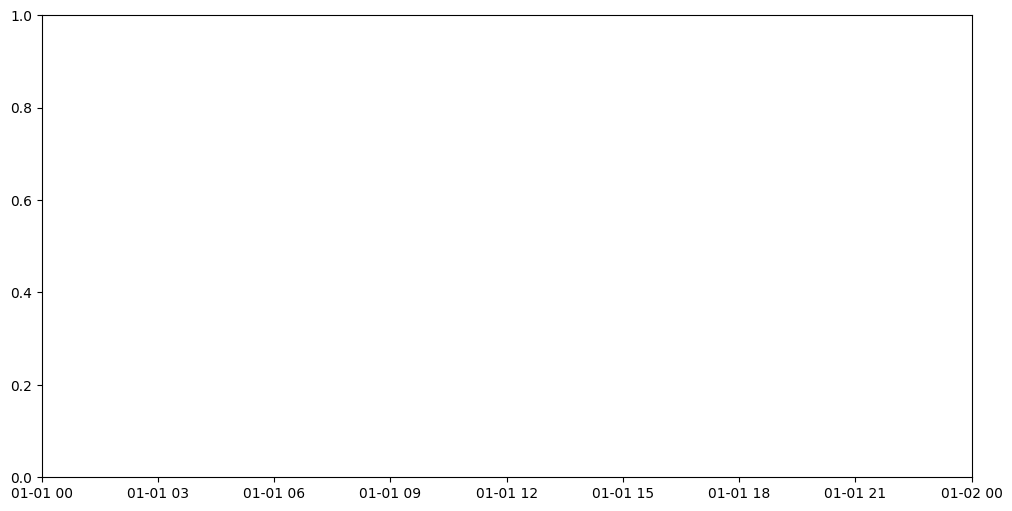

In [52]:
def moving_avg(window):
    df['moving avg'] = df['close'].rolling(window=window).mean()
    return df

df = moving_avg(20)

plt.figure(figsize=(12,6))

# Plot closing price
plt.plot(df.index, df['close'], label='Closing Price', linewidth=1.5)

# Plot 20-day moving average
plt.plot(df.index, df['moving avg'], label='20-Day Moving Average', linewidth=2, linestyle='--')

# Add chart elements
plt.title(f'{stock} Price with 20-Day Moving Average', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
